# Confidence intervals for estimation of sample mean

In [4]:
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data

In [6]:
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)

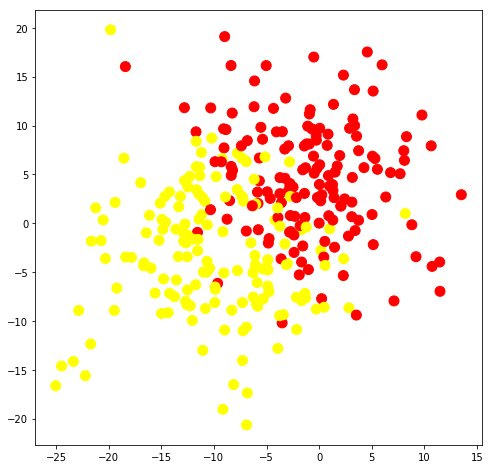

In [7]:
pylab.figure(figsize(8, 8))
pylab.scatter( blobs[0][:,0],blobs[0][:,1],c = blobs[1], cmap = 'autumn',s=100)

## Comparison of linear models

### Parameter estimation

In [8]:
train_data, test_data, train_labels, test_labels = \
                model_selection.train_test_split(blobs[0], blobs[1], \
                test_size = 15, \
                random_state = 1)

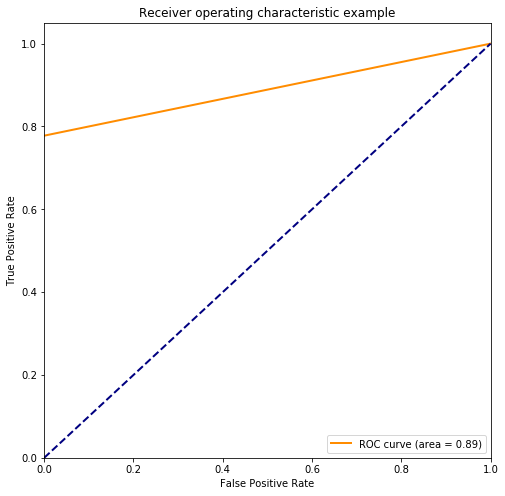

In [9]:
from sklearn.metrics import roc_curve, auc

ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

plt.figure()
lw = 2
fpr, tpr, _ = roc_curve(test_labels, ridge_model.predict(test_data))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

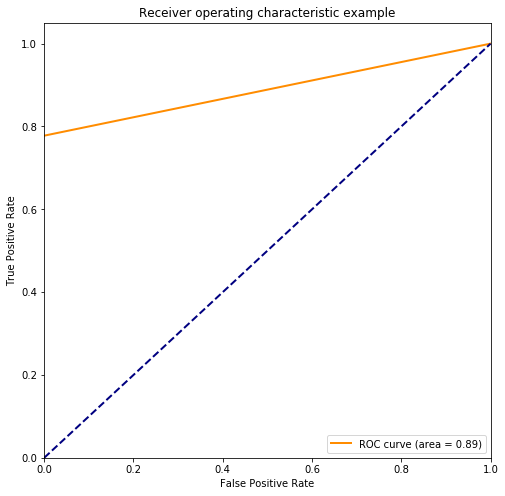

In [10]:
sgd_model = linear_model.SGDClassifier(random_state = 0,max_iter=5,tol=None)
sgd_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

plt.figure()
lw = 2
fpr, tpr, _ = roc_curve(test_labels,  sgd_model.predict(test_data))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Estimation of mean

In [11]:
sgd_auc_scores = model_selection.cross_val_score(linear_model.SGDClassifier(max_iter=5,
                                                                            tol=None), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)

In [12]:
ridge_auc_scores = model_selection.cross_val_score(linear_model.RidgeClassifier(max_iter=5,
                                                                                 tol=None), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)

### Results

In [13]:
print("sgd model auc: mean %.3f, std %.3f" % \
        (sgd_auc_scores.mean(), sgd_auc_scores.std(ddof=1)))
print("ridge model auc: mean %.3f, std %.3f" %\
        (ridge_auc_scores.mean(), ridge_auc_scores.std(ddof=1)))

sgd model auc: mean 0.939, std 0.055
ridge model auc: mean 0.948, std 0.054


### Confidence intervals for mean

In [14]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [15]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()

#### z-test

Let auc_scores be $\sigma^2=0.25$. Construct confidence intervals for means $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [16]:
print("sgd model mean auc 95%% confidence interval", 
      _zconfint_generic(sgd_mean,sqrt(0.25/len(sgd_auc_scores)),0.05, 'two-sided'))

print("ridge model mean auc 95%% confidence interval", 
      _zconfint_generic(ridge_mean,sqrt(0.25/len(sgd_auc_scores)),0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.72033046179463001, 1.1585917320829209)
ridge model mean auc 95%% confidence interval (0.72886043628442598, 1.1671217065727166)


#### t-test

Instead of theoretical value $\sigma^2$, that is unknown, consider sample variances, and confidence intervals $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [17]:
type(sgd_auc_scores)

numpy.ndarray

In [18]:
sgd_mean_std = sgd_auc_scores.std(ddof=1)/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/sqrt(len(ridge_auc_scores))

In [19]:
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(sgd_mean, sgd_mean_std,
                                                                       len(sgd_auc_scores) - 1,
                                                                       0.05, 'two-sided') )

print("ridge model mean auc 95%% confidence interval", _tconfint_generic(ridge_mean, ridge_mean_std,
                                                                         len(sgd_auc_scores) - 1,
                                                                         0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.91372625066234003, 0.96519594321521085)
ridge model mean auc 95%% confidence interval (0.92287832593023689, 0.97310381692690573)
